# Planar flows

In [21]:
import torch
import matplotlib.pyplot as plt

from models.model import PlanarFlow, NICEFlow
from target_distribution import TargetDistribution
from utils.VariationalBound import binary_loss_function  
from utils.plot import plot_available_distributions, plot_comparison

/auto/users/ms20hh/flows/normalizing-flows-reproduce/VI_planar_flows/models/utils/plot.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, U, cmap=cmap, rasterized=True)


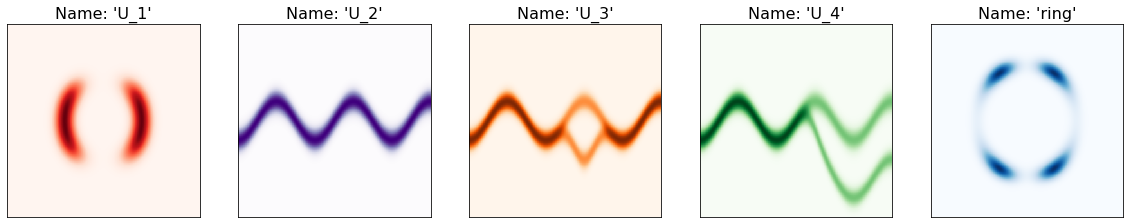

In [2]:
# Plot available distributions.
plot_available_distributions()

In [8]:
# Parameters.
target_distr = "U_1"  
flow_length = 8  
num_batches = 20000  
batch_size = 128 
lr = 6e-4  
axlim = 7 

In [9]:
# Initialise model, loss, and optimiser. 
model = PlanarFlow(K=flow_length)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
density = TargetDistribution(target_distr)

In [10]:
# Train model. 
for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = binary_loss_function(density, batch, zk, log_jacobians) #new
    
    # Train. 
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

(batch_num 01000/20000) loss: 2.0891342163085938
(batch_num 02000/20000) loss: 1.66255784034729
(batch_num 03000/20000) loss: 0.7407890558242798
(batch_num 04000/20000) loss: 0.5309904217720032
(batch_num 05000/20000) loss: -0.013883471488952637
(batch_num 06000/20000) loss: 0.06056039035320282
(batch_num 07000/20000) loss: 0.04736143350601196
(batch_num 08000/20000) loss: -0.008247524499893188
(batch_num 09000/20000) loss: 0.047141943126916885
(batch_num 10000/20000) loss: 0.09319786727428436
(batch_num 11000/20000) loss: 0.1583521068096161
(batch_num 12000/20000) loss: -0.000919640064239502
(batch_num 13000/20000) loss: 0.06842063367366791
(batch_num 14000/20000) loss: 0.05668962001800537
(batch_num 15000/20000) loss: 0.05853301286697388
(batch_num 16000/20000) loss: 0.03668031096458435
(batch_num 17000/20000) loss: 0.08084916323423386
(batch_num 18000/20000) loss: -0.02163185179233551
(batch_num 19000/20000) loss: 0.022838935256004333
(batch_num 20000/20000) loss: -0.035361111164093

/auto/users/ms20hh/flows/normalizing-flows-reproduce/VI_planar_flows/models/utils/plot.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(


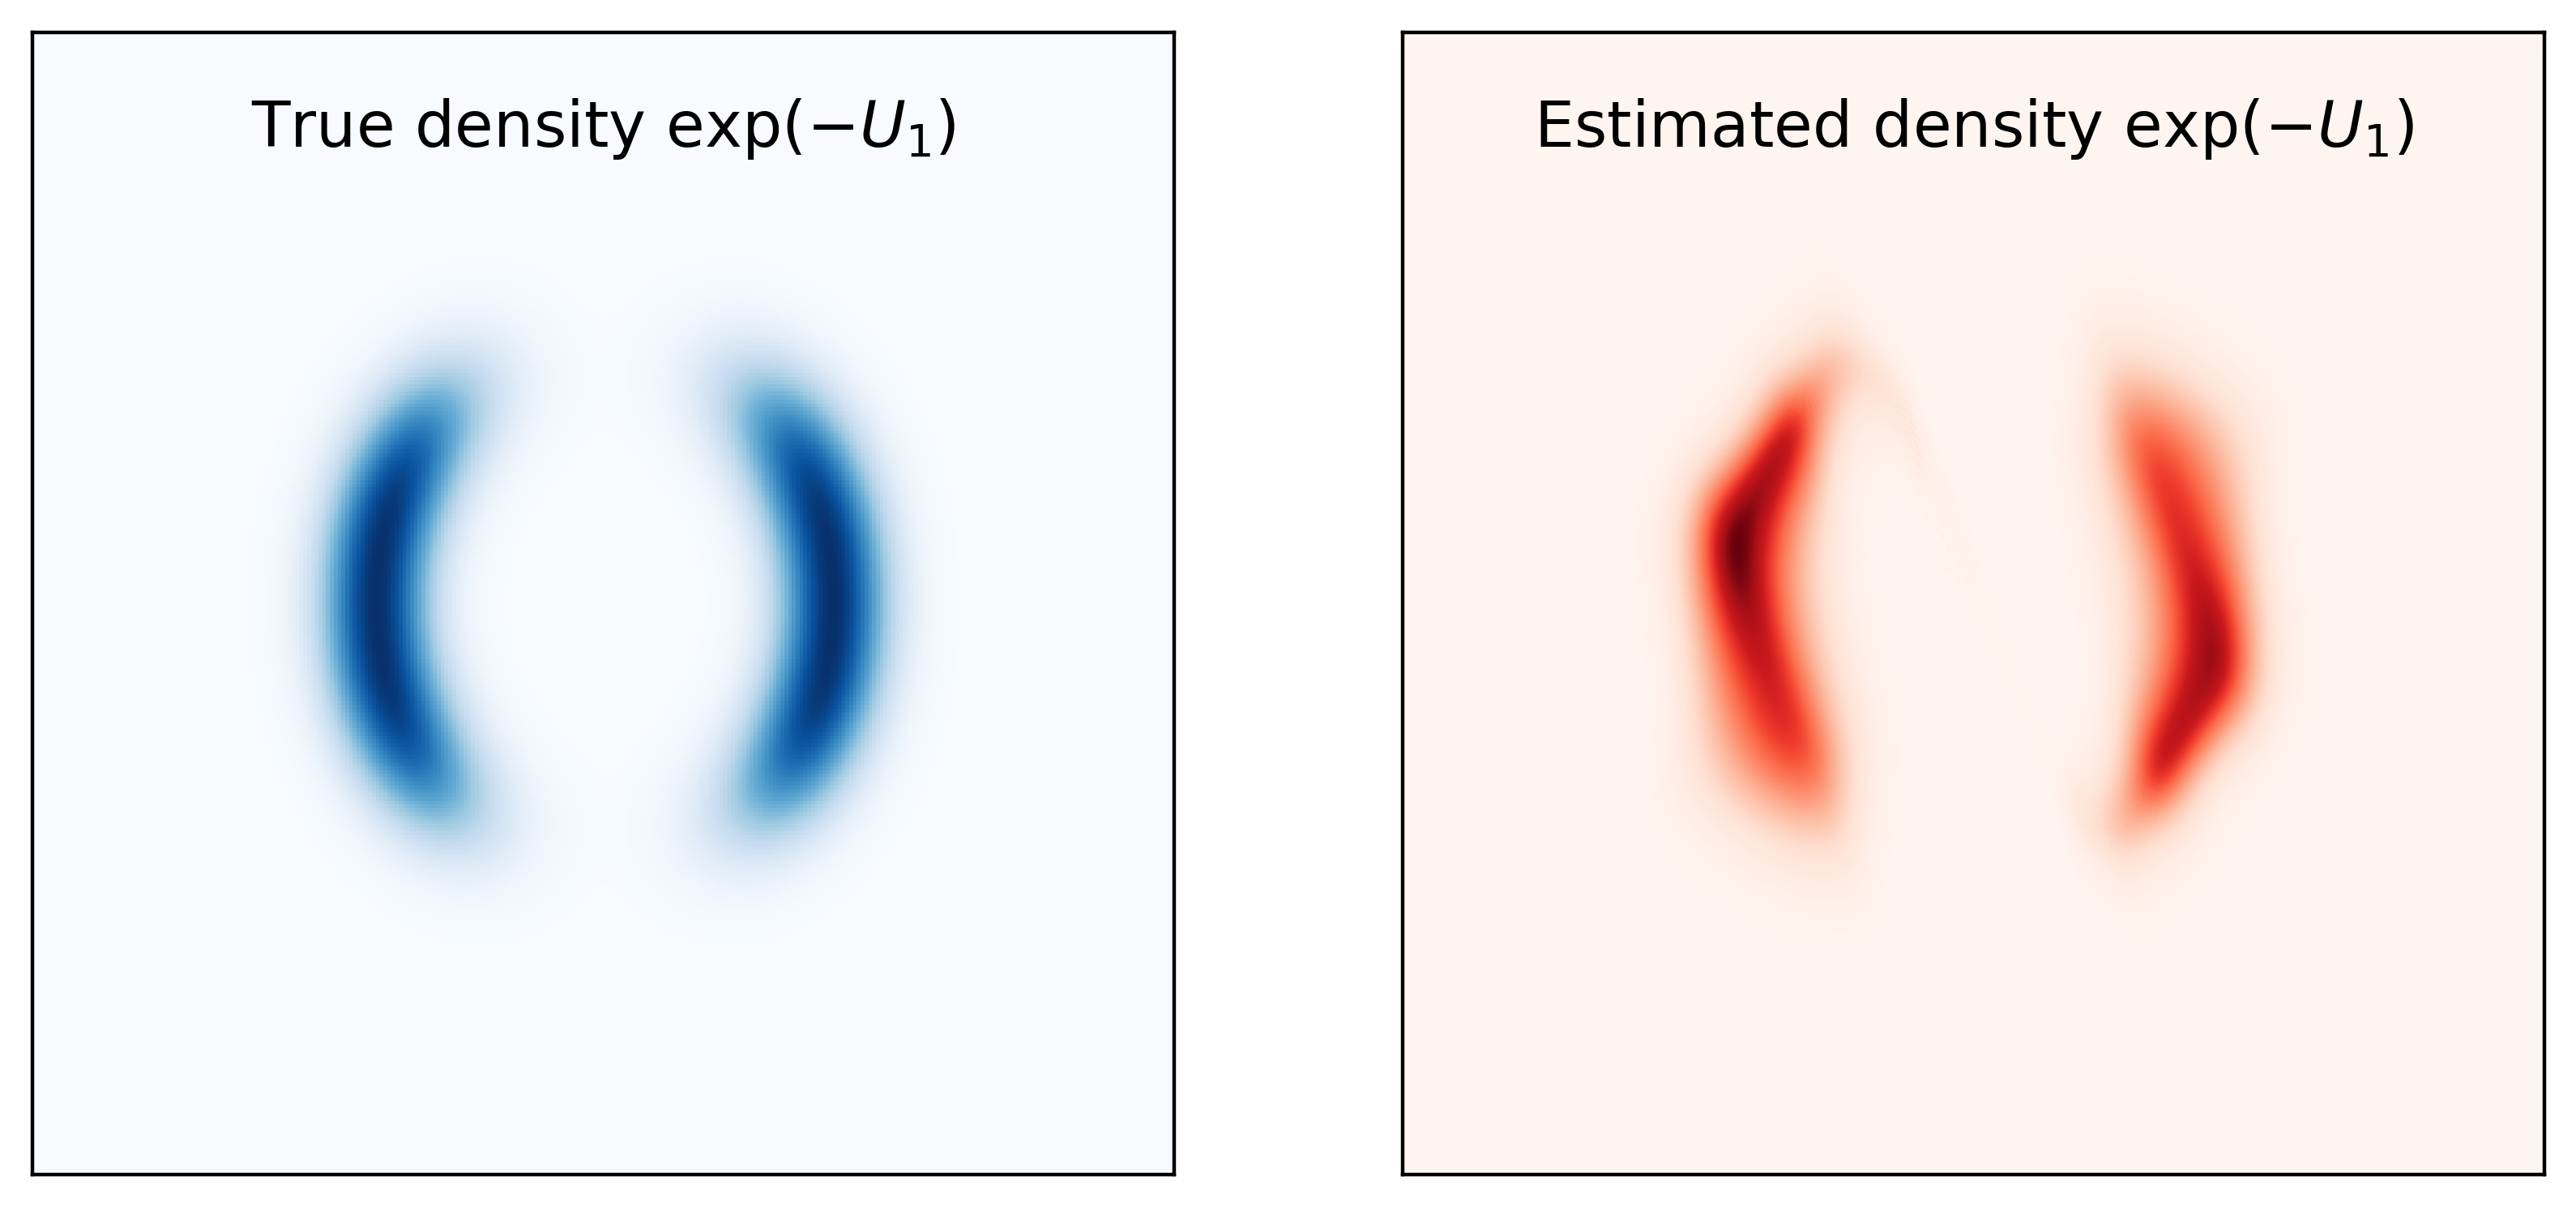

In [11]:
# Plot true and estimated denisty side by side. 
plot_comparison(model, target_distr, flow_length)

In [34]:
model = NICEFlow(K=8, in_out_dim=2, mid_dim=30)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
density = TargetDistribution(target_distr)

In [35]:
# Train model. 
for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = binary_loss_function(density, batch, zk, log_jacobians) #new
    
    # Train. 
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

(batch_num 01000/20000) loss: -0.19698189198970795
(batch_num 02000/20000) loss: -0.6091873049736023
(batch_num 03000/20000) loss: -0.7944765090942383
(batch_num 04000/20000) loss: -0.8250296711921692
(batch_num 05000/20000) loss: -0.8062918186187744
(batch_num 06000/20000) loss: -0.954983651638031
(batch_num 07000/20000) loss: -0.8589067459106445
(batch_num 08000/20000) loss: -0.9896784424781799
(batch_num 09000/20000) loss: -1.0375834703445435
(batch_num 10000/20000) loss: -1.0755667686462402
(batch_num 11000/20000) loss: -0.9677873849868774
(batch_num 12000/20000) loss: -0.9282156825065613
(batch_num 13000/20000) loss: -0.9393486380577087
(batch_num 14000/20000) loss: -0.9151003956794739
(batch_num 15000/20000) loss: -0.846146285533905
(batch_num 16000/20000) loss: -0.7829972505569458
(batch_num 17000/20000) loss: -0.8943145871162415
(batch_num 18000/20000) loss: -1.0892902612686157
(batch_num 19000/20000) loss: -0.8920043110847473
(batch_num 20000/20000) loss: -1.1256906986236572


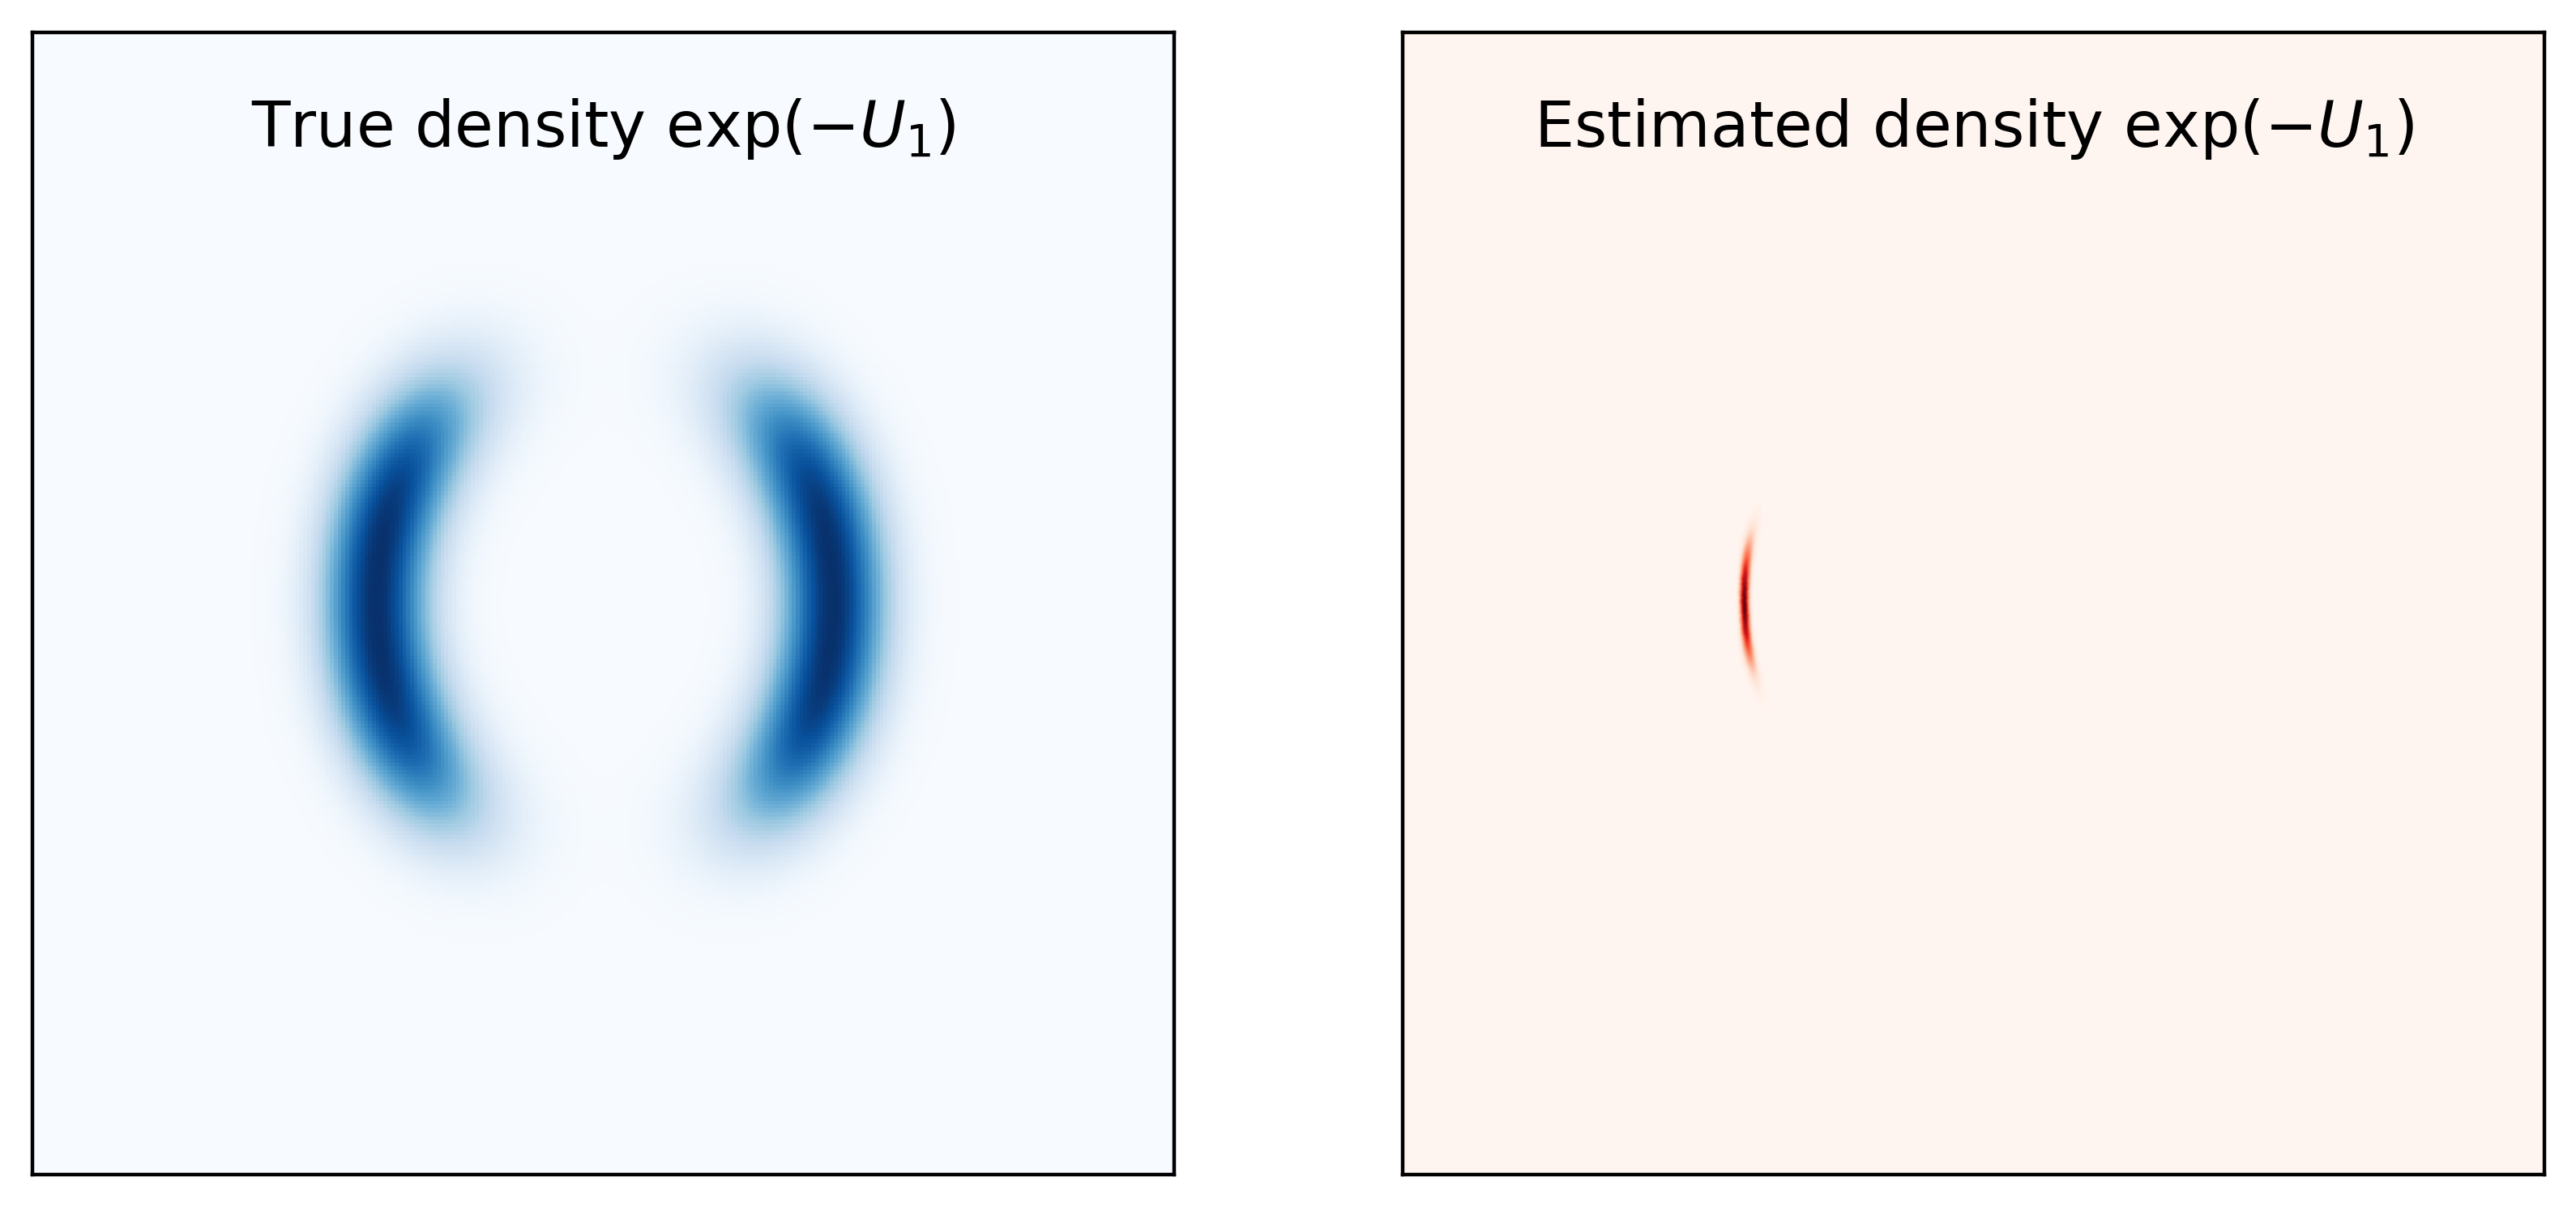

In [37]:
plot_comparison(model, target_distr, flow_length)

In [48]:
model = NICEFlow(K=32, in_out_dim=2, mid_dim=50)
optimiser = torch.optim.Adam(model.parameters(), lr=1e-4)
density = TargetDistribution(target_distr)

In [51]:
# Train model. 
num_batches = 50000  

for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = binary_loss_function(density, batch, zk, log_jacobians) #new
    
    # Train
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

(batch_num 01000/50000) loss: -0.8501316905021667
(batch_num 02000/50000) loss: -0.9235898852348328
(batch_num 03000/50000) loss: -0.9133764505386353
(batch_num 04000/50000) loss: -0.7959195971488953
(batch_num 05000/50000) loss: -1.121724247932434
(batch_num 06000/50000) loss: -0.8894196152687073
(batch_num 07000/50000) loss: -0.9353920221328735
(batch_num 08000/50000) loss: -0.92116779088974
(batch_num 09000/50000) loss: -0.9416947960853577
(batch_num 10000/50000) loss: -0.8962124586105347
(batch_num 11000/50000) loss: -0.8517236709594727
(batch_num 12000/50000) loss: -0.8185121417045593
(batch_num 13000/50000) loss: -1.036204218864441
(batch_num 14000/50000) loss: -0.93227219581604
(batch_num 15000/50000) loss: -1.0210909843444824
(batch_num 16000/50000) loss: -1.0795775651931763
(batch_num 17000/50000) loss: -0.9755390882492065
(batch_num 18000/50000) loss: -0.8798402547836304
(batch_num 19000/50000) loss: -1.0712541341781616
(batch_num 20000/50000) loss: -0.9404191970825195
(batch

/auto/users/ms20hh/flows/normalizing-flows-reproduce/VI_planar_flows/models/utils/plot.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, U, cmap=cmap, rasterized=True)
/auto/users/ms20hh/flows/normalizing-flows-reproduce/VI_planar_flows/models/utils/plot.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(


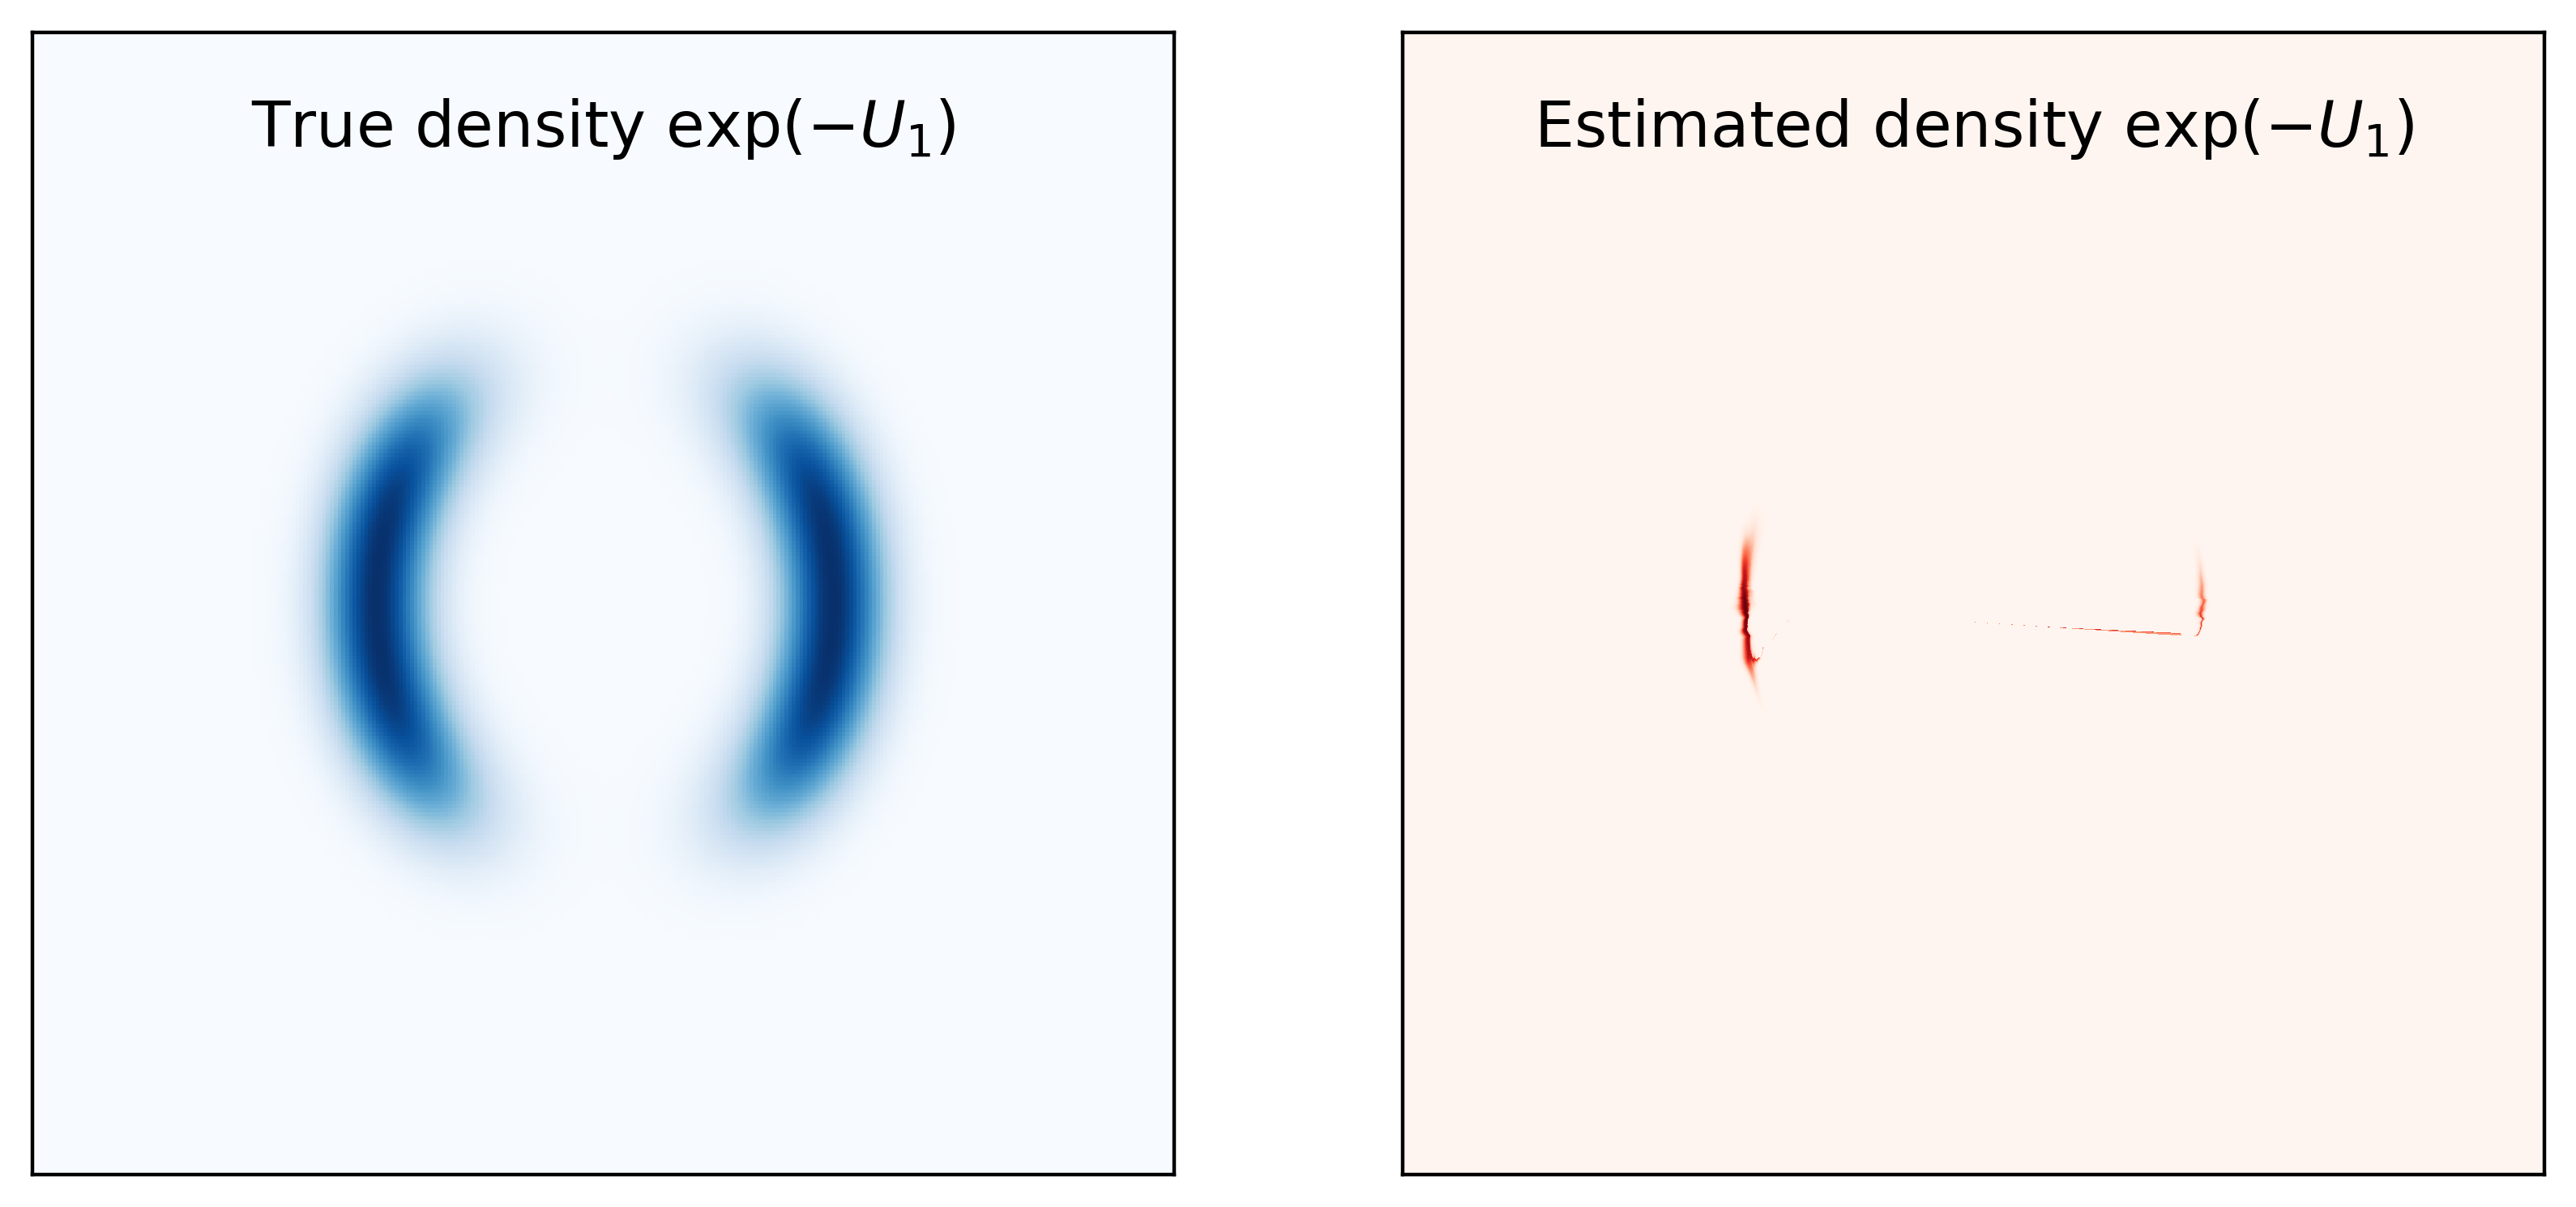

In [52]:
plot_comparison(model, target_distr, flow_length)